In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
sales_data = pd.read_csv('/Users/kristofnagy/Desktop/eltecon-ds-class/data/sales_sample.csv')

In [7]:
sales_data['purchase_date'] = pd.to_datetime(sales_data.purchase_date)

In [8]:
sales_data.head()

,contact_id,order_id,purchase_date,sales_amount,quantity,customer_lifecycle_status
0,32,1,2016-07-31,103.07,6,Lead
1,32,2,2016-08-08,47.28,2,First time buyer
2,32,3,2016-08-28,162.15,8,Active customer
3,32,4,2016-10-18,84.47,3,Defecting customer
4,112,5,2017-02-14,44.97,3,Lead


In [10]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2504556 entries, 0 to 2504555
Data columns (total 6 columns):
contact_id                   int64
order_id                     int64
purchase_date                datetime64[ns]
sales_amount                 float64
quantity                     int64
customer_lifecycle_status    object
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 114.6+ MB


In [11]:
sales_data.customer_lifecycle_status.unique()

array(['Lead', 'First time buyer', 'Active customer',
       'Defecting customer', 'Inactive customer'], dtype=object)

In [19]:
df = pd.DataFrame({'quantity' : sales_data.groupby('customer_lifecycle_status').quantity.sum()}).reset_index()

In [28]:
df.sort_values(by = 'quantity', ascending=False ,inplace=True)

In [29]:
df.head()

,customer_lifecycle_status,quantity
4,Lead,3817960
1,Defecting customer,989399
0,Active customer,798399
2,First time buyer,572615
3,Inactive customer,206207


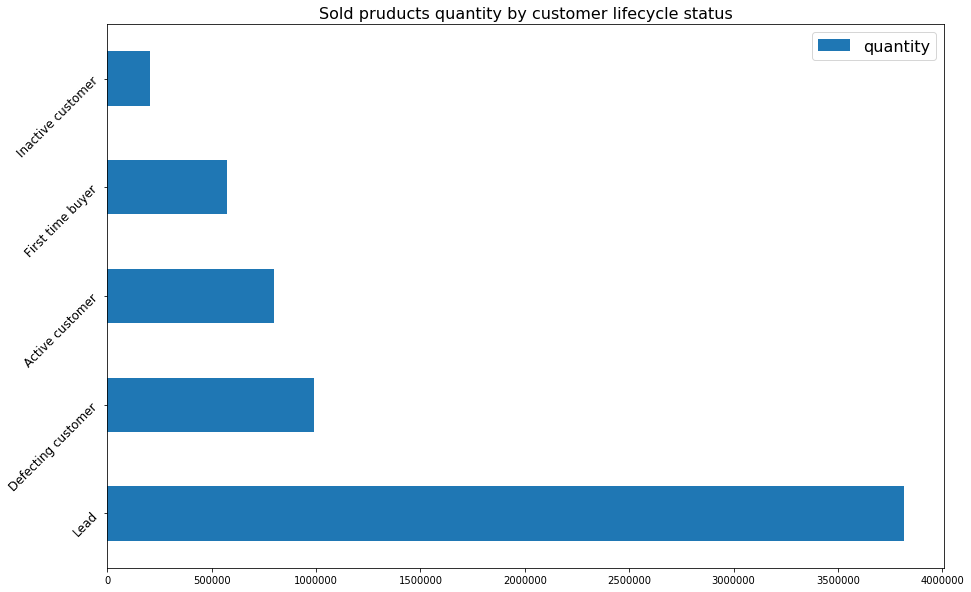

In [58]:
fig, ax = plt.subplots(figsize=(15, 10))

df.plot(ax=ax, kind = 'barh')

plt.yticks(np.arange(5), labels = [i for i in df.customer_lifecycle_status], fontsize=12, rotation=45)
plt.title('Sold pruducts quantity by customer lifecycle status', fontsize=16)
plt.xlim(0, df.quantity.max()*1.05)
plt.legend(fontsize=16)

plt.show()